# Preprocessing

In [2]:
import idx2numpy
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte.unknown')
test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte.unknown')


In [3]:
import numpy as np

img_preprocessed_train = np.array([img.flatten() for img in train_images])
img_preprocessed_test = np.array([img.flatten() for img in test_images])

In [4]:
img_preprocessed =  np.concatenate((img_preprocessed_train, img_preprocessed_test), axis=0)
labels =  np.concatenate((train_labels, test_labels), axis=0)

In [5]:
import pandas as pd
df_minst = pd.DataFrame(img_preprocessed)
df_minst['labels'] = labels

In [6]:
df_minst_x = df_minst.drop('labels', axis=1)


In [7]:
df_minst_x = df_minst_x[:20000]
df_minst_x_mean = df_minst_x.mean(axis=0)
df_minst_x_std = df_minst_x.std(axis=0)

df_minst_x_norm = (df_minst_x - df_minst_x_mean) / (df_minst_x_std + 0.000001)
df_minst_x_norm

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031855,-0.027449,-0.019555,-0.016876,-0.014285,-0.007071,0.0,0.0,0.0,0.0


In [8]:
df_minst_x_norm = df_minst_x_norm.to_numpy()

# A) run KMeans on the MNIST Dataset, try K=10

In [9]:
df_minst_x_norm.shape

(20000, 784)

In [11]:
# Consider random k point in the plane
import numpy as np

k = 10
centers = []
for i in range(k):
    centers.append(np.random.uniform(-1, 1, size=784))
centers = np.array(centers)
centers.shape

(10, 784)

In [6]:
from scipy.spatial.distance import cdist

def em_steps(norm_data, centers, k):
    distance_matrix = cdist(norm_data, centers, metric='euclidean')
    members = [[] for _ in range(k)]
    clusters = np.argmin(distance_matrix, axis=1)
    num_clusters = len(clusters)
    
    members_ind = [[] for _ in range(k)]

    for c in range(num_clusters):
        cluster = clusters[c]
        members[cluster].append(norm_data[c])
        members_ind[cluster].append(c)
    
    for member in range(len(members)):
        members[member] = np.mean(np.array(members[member]), axis=0).ravel()

    new_centers = np.array(members)
    return new_centers, members_ind


In [7]:
def calculate_obj(norm_data, centers, k, dist):
    from scipy.spatial.distance import cdist
    distance_matrix = cdist(norm_data, centers, metric= dist)
    data_size = norm_data.shape[0]
    pi = np.array([[0 for _ in range(k)] for _ in range(data_size)])
    x = np.argmin(distance_matrix, axis=1)

    for cluster in range(len(x)):
        pi[cluster, x[cluster]] = 1
    
    objective_val = np.matmul(pi.T, distance_matrix).diagonal().sum()
    return objective_val

# calculate_obj(df_minst_x_norm, centers)
    

In [8]:
from scipy.spatial.distance import cdist
from tqdm import tqdm

def converge(norm_data, k_val, max_iter, dist='euclidean'):
    k = k_val
    centers = []
    s = norm_data.shape[1]
    for i in range(k):
        centers.append(np.random.uniform(-1, 1, size=s))

    objective_val = calculate_obj(norm_data, centers, k, dist)
    categorized_clusters_ind = []
    pre_objective_val = float('infinity')
    
    # while objective_val < pre_objective_val:
    for i in tqdm(range(max_iter), desc="Convergence Progress"):
        centers, cluster_ind = em_steps(norm_data, centers, k)
        categorized_clusters_ind = cluster_ind.copy()

        pre_objective_val = objective_val
        objective_val = calculate_obj(norm_data, centers, k, dist)
        # print('objective_val', objective_val)
        
    return categorized_clusters_ind


In [128]:
final_clusters_ind1 = converge(df_minst_x_norm, k, 100)

Convergence Progress: 100%|██████████| 100/100 [00:33<00:00,  3.00it/s]


In [129]:
from scipy import stats

def purity(final_clusters_ind, df_minst, N):
    n = len(final_clusters_ind)
    sum = 0

    if isinstance(df_minst, (pd.DataFrame, pd.Series)):
        df_minst = df_minst.to_numpy()

    for i in range(n):
        cluster = np.array(final_clusters_ind[i])
        cluster_with_labels = df_minst[final_clusters_ind[i], 784]
        majority, count = stats.mode(cluster_with_labels, keepdims=True)
        sum += count[0]

    purity = sum/N
    return purity
    

In [105]:
def gini_index(final_clusters_ind, df_minst, col, N):
    if isinstance(df_minst, (pd.DataFrame, pd.Series)):
        df_minst = df_minst.to_numpy()

    n= len(final_clusters_ind)
    ginis = []
    for c in range(n):
        cluster = np.array(final_clusters_ind[c])
        cluster_with_labels = df_minst[cluster, col]
        ele, counts = np.unique(cluster_with_labels, return_counts=True)
        cluster_gini = 1 - np.sum((counts / np.sum(counts)) ** 2)
        ginis.append(cluster_gini)
    ginis = np.array(ginis)
    weights = np.array([len(i)/N for i in final_clusters_ind])
    gini = ginis * weights
    return np.sum(gini)


0.7511740152398323

In [108]:
# for k = 10
print("purity", purity(final_clusters_ind1, df_minst, 20000))
print("gini index", gini_index(final_clusters_ind1, df_minst, 784, 20000))

purity 0.48405
gini index 0.6370353481219888


In [109]:
# for k = 20
final_clusters_ind_double = converge(df_minst_x_norm, k*2, 100)
print("purity", purity(final_clusters_ind_double, df_minst, 20000))
print("gini index", gini_index(final_clusters_ind_double, df_minst, 784, 20000))

Convergence Progress: 100%|██████████| 100/100 [00:57<00:00,  1.75it/s]

purity 0.5914
gini index 0.5337594065488835


In [112]:
final_clusters_ind_half = converge(df_minst_x_norm, k//2, 100)


Convergence Progress: 100%|██████████| 100/100 [00:24<00:00,  4.09it/s]

purity 0.36135
gini index 0.7516031708279011


In [113]:
# for k = 5
print("purity", purity(final_clusters_ind_half, df_minst, 20000))
print("gini index", gini_index(final_clusters_ind_half, df_minst, 784, 20000))

purity 0.36135
gini index 0.7516031708279011


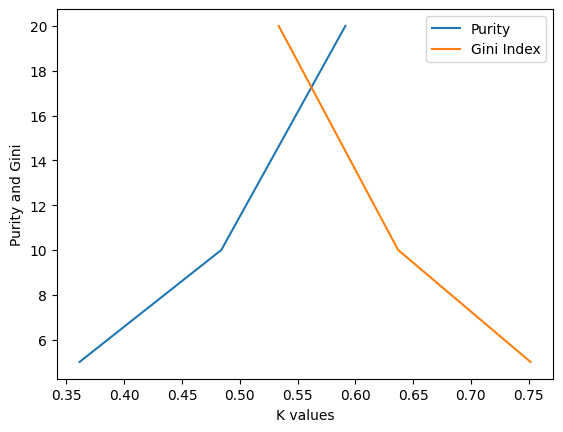

In [117]:
import matplotlib.pyplot as plt

plt.plot([0.36135, 0.48405, 0.5914], [5, 10, 20], label = 'Purity')
plt.plot([0.75160, 0.6370, 0.5337], [5, 10, 20], label = 'Gini Index')
plt.xlabel('K values')
plt.ylabel('Purity and Gini')

plt.legend()


We can observe that as k value increases gini index reduces whereas purity increases.

# B) run KMeans on the FASHION Dataset, try K=10

In [118]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

2025-02-02 12:03:02.374258: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 12:03:02.456246: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 12:03:02.457327: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-02 12:03:10.444918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [119]:
df_fashion = np.array([img.flatten() for img in X])
df_fashion = df_fashion[:20000]

In [120]:
import pandas as pd
df_fashion = pd.DataFrame(df_fashion)
df_fashion['labels'] = y[:20000]

In [121]:
df_fashion_x = df_fashion.drop('labels', axis=1)
df_fashion_x_mean = df_fashion_x.mean(axis=0)
df_fashion_x_std = df_fashion_x.std(axis=0)

df_fashion_x_norm = (df_fashion_x - df_fashion_x_mean) / (df_fashion_x_std + 0.000001)
df_fashion_x_norm

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,-0.071502,-0.099371,-0.159692,-0.238653,-0.374297,...,-0.603587,-0.476228,-0.395797,-0.402048,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036
1,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,0.089194,-0.099371,-0.159692,-0.238653,-0.374297,...,1.469925,1.860402,2.716740,1.354038,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036
2,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,-0.071502,-0.099371,-0.159692,-0.238653,0.201660,...,-0.603587,-0.476228,-0.371855,-0.402048,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036
3,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,-0.071502,-0.099371,-0.159692,1.124830,2.138970,...,-0.603587,-0.476228,-0.395797,-0.402048,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036
4,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,-0.071502,-0.099371,-0.159692,-0.238653,-0.374297,...,-0.603587,-0.476228,-0.395797,-0.402048,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,-0.071502,-0.099371,-0.159692,-0.197335,-0.374297,...,2.933582,2.618782,-0.395797,-0.402048,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036
19996,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,-0.071502,-0.099371,-0.159692,-0.238653,-0.374297,...,1.069162,-0.476228,-0.395797,-0.402048,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036
19997,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,-0.071502,-0.099371,-0.159692,-0.238653,-0.374297,...,-0.551314,-0.476228,-0.395797,-0.402048,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036
19998,-0.010861,-0.022244,-0.033499,-0.04577,-0.056837,-0.071502,-0.099371,-0.159692,-0.238653,-0.374297,...,-0.603587,-0.476228,-0.395797,-0.402048,-0.435776,-0.393878,-0.286460,-0.154018,-0.089502,-0.034036


In [122]:
df_fashion_x_norm = df_fashion_x_norm.to_numpy()

In [123]:
# Consider random k point in the plane
import numpy as np

k = 10
centers = []
for i in range(k):
    centers.append(np.random.uniform(-1, 1, size=784))
centers = np.array(centers)
centers.shape

(10, 784)

In [ ]:
purity

In [130]:
# for k = 10
final_clusters_ind_minist = converge(df_fashion_x_norm, k, 100)
print("purity", purity(final_clusters_ind_minist, df_fashion, 20000))
print("gini index", gini_index(final_clusters_ind_minist, df_fashion, 784, 20000))

Convergence Progress: 100%|██████████| 100/100 [00:31<00:00,  3.22it/s]

purity 0.52675
gini index 0.5746044593938892


In [131]:
# for k = 20 (double)
final_clusters_ind_minist_double = converge(df_fashion_x_norm, k*2, 100)
print("purity", purity(final_clusters_ind_minist_double, df_fashion, 20000))
print("gini index", gini_index(final_clusters_ind_minist_double, df_fashion, 784, 20000))

Convergence Progress: 100%|██████████| 100/100 [00:56<00:00,  1.78it/s]

purity 0.6456
gini index 0.4570254057302016


In [133]:
# for k = 5 (half)
final_clusters_ind_minist_half = converge(df_fashion_x_norm, k//2, 100)
print("purity", purity(final_clusters_ind_minist_half, df_fashion, 20000))
print("gini index", gini_index(final_clusters_ind_minist_half, df_fashion, 784, 20000))

Convergence Progress: 100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


purity 0.4103
gini index 0.7024214238605913


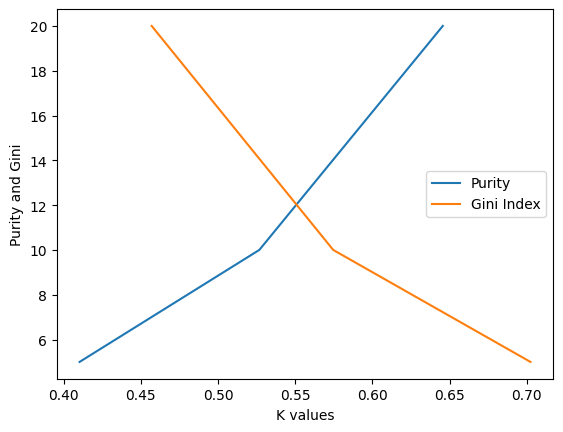

In [134]:
import matplotlib.pyplot as plt

plt.plot([0.4103, 0.52675, 0.6456], [5, 10, 20], label = 'Purity')
plt.plot([ 0.7024, 0.5746, 0.4570], [5, 10, 20], label = 'Gini Index')
plt.xlabel('K values')
plt.ylabel('Purity and Gini')

plt.legend()


# C) run KMeans on the 20NG Dataset, try K=20

In [1]:
import pandas as pd
from scipy import stats

def gini_index(final_clusters_ind, df_minst, col, N):
    if isinstance(df_minst, (pd.DataFrame, pd.Series)):
        df_minst = df_minst.to_numpy()

    n= len(final_clusters_ind)
    ginis = []
    for c in range(n):
        cluster = np.array(final_clusters_ind[c])
        cluster_with_labels = df_minst[cluster, col]
        ele, counts = np.unique(cluster_with_labels, return_counts=True)
        cluster_gini = 1 - np.sum((counts / np.sum(counts)) ** 2)
        ginis.append(cluster_gini)
    ginis = np.array(ginis)
    weights = np.array([len(i)/N for i in final_clusters_ind])
    gini = ginis * weights
    return np.sum(gini)



def purity(final_clusters_ind, df_minst, N, col):
    n = len(final_clusters_ind)
    sum = 0

    if isinstance(df_minst, (pd.DataFrame, pd.Series)):
        df_minst = df_minst.to_numpy()

    for i in range(n):
        cluster = np.array(final_clusters_ind[i])
        cluster_with_labels = df_minst[final_clusters_ind[i], col]
        majority, count = stats.mode(cluster_with_labels, keepdims=True)
        sum += count[0]

    purity = sum/N
    return purity


In [2]:
def read_20ng_and_convert(file_path = '20ng.csv'):
    from sklearn.feature_extraction.text import TfidfVectorizer
    import pandas as pd

    df = pd.read_csv(file_path)
    df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)
    classes = ["alt.atheism", "sci.med", "sci.electronics", "comp.graphics", "talk.politics.guns", "sci.crypt"]
    df = df[df['index'].isin(classes)]
    vectorizer = TfidfVectorizer(use_idf=False, max_features=30000)
    sparse_matrix = vectorizer.fit_transform(df['content'])
    sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=vectorizer.get_feature_names_out())
    sparse_df_mean = sparse_df.mean(axis=0)
    sparse_std_sub = sparse_df.sparse.to_dense().std(axis=0)
    sparse_df = (sparse_df - sparse_df_mean)/sparse_std_sub
    sparse_df['index'] = df['index'].to_numpy()
    return sparse_df

In [3]:
sparse_df = read_20ng_and_convert()

In [4]:
df_20ng = sparse_df.drop('index', axis=1)
df_20ng = df_20ng.to_numpy()

In [9]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

k = 20
final_clusters_ind2 = converge(df_20ng, k, 60, 'cosine')

column_index = sparse_df.columns.get_loc('index')

print("purity", purity(final_clusters_ind2, sparse_df, 6000, column_index))
print("gini index", gini_index(final_clusters_ind2, sparse_df, column_index, 6000))

Convergence Progress: 100%|██████████| 60/60 [22:36<00:00, 22.60s/it]


purity 0.343
gini index 0.7558434556472404


In [10]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

k = 20
final_clusters_ind_double = converge(df_20ng, k*2, 60, 'cosine')

print("purity", purity(final_clusters_ind_double, sparse_df, 6000, column_index))
print("gini index", gini_index(final_clusters_ind_double, sparse_df, column_index, 6000))

Convergence Progress: 100%|██████████| 60/60 [36:52<00:00, 36.88s/it]


purity 0.35433333333333333
gini index 0.7542704175179064


In [11]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

k = 20
final_clusters_ind_half = converge(df_20ng, k//2, 60, 'cosine')

print("purity", purity(final_clusters_ind_half, sparse_df, 6000, column_index))
print("gini index", gini_index(final_clusters_ind_half, sparse_df, column_index, 6000))

Convergence Progress: 100%|██████████| 60/60 [18:05<00:00, 18.09s/it]


purity 0.347
gini index 0.7634986825002776


# Soft K means

In [121]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.special import softmax
from tqdm import tqdm

def e_step(norm_data, centers, k, b):
    distance_matrix = cdist(norm_data, centers, metric='euclidean')
    probs = []
    for i in range(k):
        prob = np.exp(-b * distance_matrix[:, i])
        probs.append(prob)
    probs = np.array(probs)
    probs_sum = np.sum(probs, axis=1)
    probs = probs.T/probs_sum
    return probs
    
def m_step(pi_vals, norm_data, k):
    n = norm_data.shape[0]
    mus = []
    for i in range(k):
        pi = pi_vals[:, i]
        pi_sum = np.sum(pi)
        mu = np.sum(norm_data * pi.reshape(n, 1), axis=0) / pi_sum
        mus.append(mu)
    return np.array(mus)

def calculate_obj(norm_data, centers, k, pi_vals):
    distance_matrix = cdist(norm_data, centers, metric='euclidean')
    objective_val = np.sum(pi_vals * distance_matrix)
    return objective_val

def converge(norm_data, k_val, max_iter, b, tol=1e-4, dist='euclidean'):
    k = k_val
    n, s = norm_data.shape
    np.random.seed(42)
    
    centers = np.random.uniform(-1, 1, size=(k, s))

    prev_objective_val = np.inf
    
    for i in tqdm(range(max_iter), desc="Convergence Progress"):
        pi_vals = e_step(norm_data, centers, k, b)
        mus = m_step(pi_vals, norm_data, k)
        objective_val = calculate_obj(norm_data, centers, k, pi_vals)
        
    
    return mus, pi_vals


In [ ]:
import numpy as np

def calculate_purity(true_labels, pi_vals):
    n = pi_vals.shape[0]
    k = pi_vals.shape[1]
    
    clusters = np.argmax(pi_vals, axis=1)
    
    purity = 0
    for cluster in range(k):
        cluster_ind = np.where(clusters == cluster)[0]
        
        if len(cluster_ind) == 0:
            continue
        
        labels = true_labels[cluster_ind]
        unique, counts = np.unique(labels, return_counts=True)
        mode = np.max(counts)
        purity += mode
    
    purity /= n
    return purity


In [ ]:
true_labels = df_minst.iloc[:20000, 784].to_numpy()

In [130]:
centers, pi_vals = converge(df_minst_x_norm, 10, 100, 0.1)

Convergence Progress: 100%|██████████| 100/100 [02:10<00:00,  1.30s/it]


In [131]:
purity = calculate_purity(true_labels, pi_vals)
print("Purity: ", purity)

Purity:  0.22505


In [133]:
centers, pi_vals = converge(df_minst_x_norm, 10, 200, 1)


Convergence Progress: 100%|██████████| 200/200 [04:22<00:00,  1.31s/it]


In [134]:
purity = calculate_purity(true_labels, pi_vals)
print("Purity: ", purity)

Purity:  0.207


In [126]:
centers, pi_vals = converge(df_minst_x_norm, 10, 100, 10)

Convergence Progress: 100%|██████████| 100/100 [02:09<00:00,  1.30s/it]


In [127]:
purity = calculate_purity(true_labels, pi_vals)
print("Purity: ", purity)

Purity:  0.21025


In [80]:
centers, pi_vals = converge(df_minst_x_norm, 10, 200, 3)

Convergence Progress: 100%|██████████| 200/200 [04:20<00:00,  1.30s/it]


In [116]:
purity = calculate_purity(true_labels, pi_vals)
print("Purity: ", purity)

Purity:  0.24535


For beta = 0.1 we get 0.20 <br>
For beta = 1 we get 0.21 <br>
For beta = 10 we get 0.24 <br>